In [29]:
import pandas as pd
import numpy as np

In [2]:
df_listing = pd.read_csv('../generated_data/listings_calc.csv')

In [3]:
df_sentiment = pd.read_csv('../generated_data/sentiment_calc.csv')

In [4]:
df_calendar = pd.read_csv('../generated_data/6month_occupancy.csv')

# Joining data together

In [5]:
df_listing.head(3)

,id,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,latitude,longitude,property_type,accommodates,bathrooms,...,neighbour_Passy,neighbour_Popincourt,neighbour_Reuilly,neighbour_Temple,neighbour_Vaugirard,neighbour_Élysée,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,33065009,28313443,0,72.0,1,48.86847,2.35209,1,8,2.0,...,0,0,0,0,0,0,1,0,0,0
1,33008241,248419822,0,1.0,1,48.86512,2.35333,1,3,1.0,...,0,0,0,1,0,0,1,0,0,0
2,39024702,115296025,0,32.0,1,48.86914,2.34817,1,4,1.0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
df_sentiment.head(3)

,index,listingid,sentimentscore,neutralreview,goodreview,badreview
0,0,3109,0.000000,5,0,0
1,1,5396,0.827062,0,168,6
2,2,7397,0.857872,0,215,4


In [8]:
del df_sentiment['index']

In [7]:
df_calendar.head(3)

,listing_id,occupied
0,3109,0.450331
1,5396,0.370861
2,7397,0.364238


In [12]:
df = pd.merge(left=df_calendar, 
              right=df_sentiment,
              left_on='listing_id',
              right_on='listingid',
              how='inner')

del df['listingid']

In [13]:
df.head(3)

,listing_id,occupied,sentimentscore,neutralreview,goodreview,badreview
0,3109,0.450331,0.000000,5,0,0
1,5396,0.370861,0.827062,0,168,6
2,7397,0.364238,0.857872,0,215,4


In [14]:
df = pd.merge(left=df,
              right=df_listing,
              left_on='listing_id',
              right_on='id',
              how='inner')

In [17]:
df.head(3)

,listing_id,occupied,sentimentscore,neutralreview,goodreview,badreview,id,host_id,host_is_superhost,host_listings_count,...,neighbour_Passy,neighbour_Popincourt,neighbour_Reuilly,neighbour_Temple,neighbour_Vaugirard,neighbour_Élysée,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,3109,0.450331,0.000000,5,0,0,3109,3631,0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,5396,0.370861,0.827062,0,168,6,5396,7903,0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,7397,0.364238,0.857872,0,215,4,7397,2626,0,2.0,...,0,0,0,0,0,0,1,0,0,0


# Building ML model to predict occupancy rate

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
target = 'occupied'
input_cols = ['host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'property_type', 'accommodates',
              'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee', 'minimum_nights',
              'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
              'reviews_per_month', 'dist_from_centre', 'neighbour_Batignolles-Monceau', 'neighbour_Bourse',
              'neighbour_Buttes-Chaumont', 'neighbour_Buttes-Montmartre', 'neighbour_Entrepôt', 'neighbour_Gobelins',
              'neighbour_Hôtel-de-Ville', 'neighbour_Louvre', 'neighbour_Luxembourg', 'neighbour_Ménilmontant',
              'neighbour_Observatoire', 'neighbour_Opéra', 'neighbour_Palais-Bourbon', 'neighbour_Panthéon',
              'neighbour_Passy', 'neighbour_Popincourt', 'neighbour_Reuilly', 'neighbour_Temple', 'neighbour_Vaugirard',
              'neighbour_Élysée', 'room_Entire home/apt', 'room_Hotel room', 'room_Private room', 'room_Shared room',
              'sentimentscore', 'neutralreview', 'goodreview', 'badreview', 'price']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[input_cols], df[target], test_size=0.2, random_state=42)

In [22]:
gbm = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)

In [23]:
gbm.fit(X_train[input_cols], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
df_importances = pd.DataFrame(data=gbm.feature_importances_, columns=['importances'], index=input_cols)

In [26]:
df_importances.sort_values(by='importances', ascending=False).head(10)

,importances
host_listings_count,0.187353
reviews_per_month,0.110095
dist_from_centre,0.086395
cleaning_fee,0.072639
sentimentscore,0.072377
number_of_reviews,0.067108
goodreview,0.053555
security_deposit,0.047702
minimum_nights,0.045843
review_scores_rating,0.027479


# Visual

In [34]:
import matplotlib.pyplot as plt

In [37]:
df['reviews_per_month'].min()

0.01

In [38]:
df['reviews_per_month'].max()

47.38

In [89]:
reviews = [x for x in range(-100, 100, 2)]
ppd = {}
for rev in reviews:
    temp_df = df.copy()
    temp_df['sentimentscore'] = rev / 100
    temp_df['pred'] = gbm.predict(temp_df[input_cols])
    temp_df['diff'] = temp_df['pred'] - temp_df[target]
    ppd[rev/100] = temp_df['diff'].mean()

In [90]:
df_plot = pd.DataFrame(data=ppd.values(), columns=['values'], index=ppd.keys())

Text(0, 0.5, '+ / - Avg booked rate change for the next 6 month')

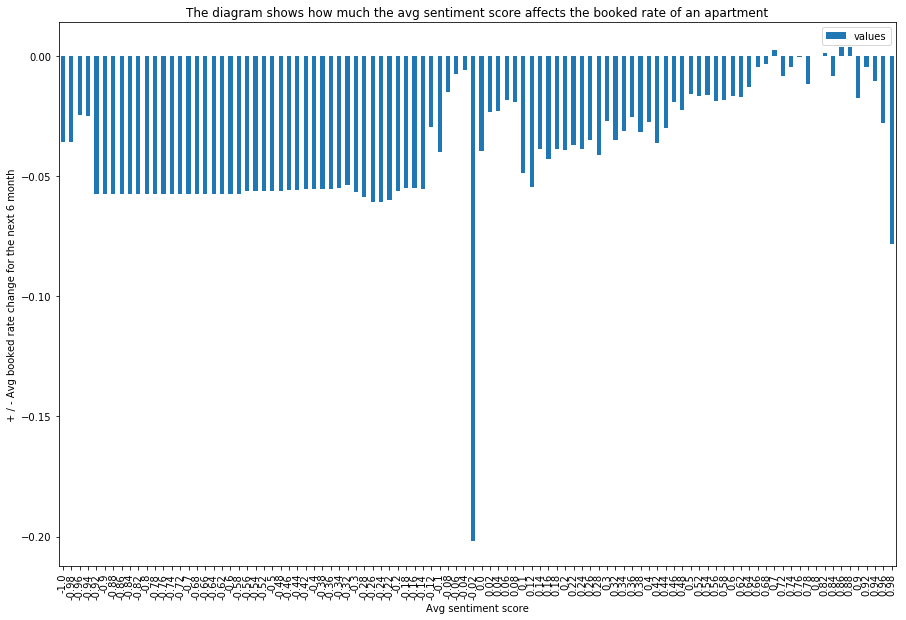

In [91]:
df_plot.plot(kind='bar', figsize=(15,10))
plt.title('The diagram shows how much the avg sentiment score affects the booked rate of an apartment')
plt.xlabel('Avg sentiment score')
plt.ylabel('+ / - Avg booked rate change for the next 6 month')

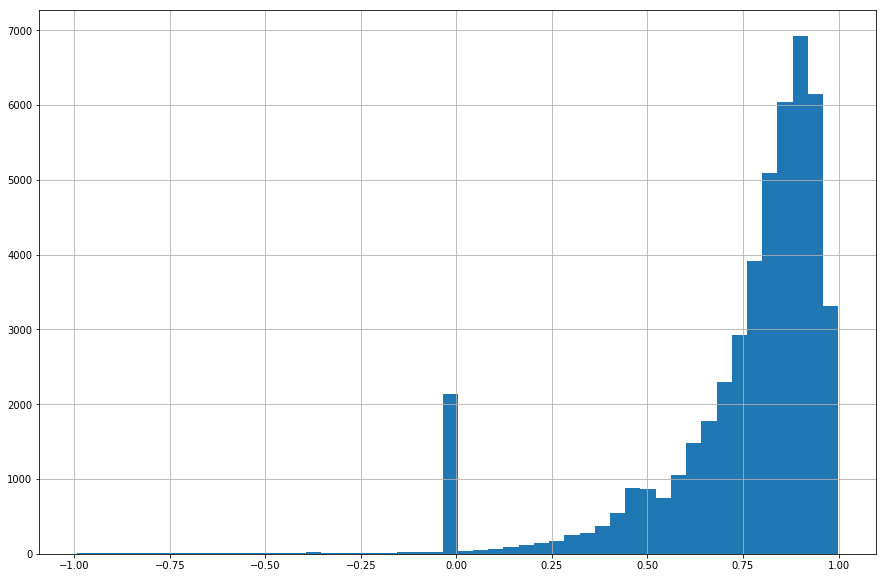

In [88]:
df['sentimentscore'].hist(bins=50, figsize=(15, 10))
plt.show()

# What could the big diff mean at sentiments score 0?

In [71]:
df_exp = pd.read_csv('../generated_data/sentiment.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
df_exp = df_exp[df_exp['lang_clean'] == 'en']

In [73]:
df_exp.shape

(821550, 10)

In [74]:
df_exp = df_exp[df_exp['sentiment_score'] == 0]

In [75]:
df_exp.shape

(32192, 10)

In [76]:
df_exp.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment,sentiment_score,language,lang_clean
0,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,[en:0.999996915747983],en
1,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,[en:0.9999987775553616],en
4,3109,234257457,2018-02-12,3539452,Dominique,The host canceled this reservation 8 days befo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,[en:0.9999971994223529],en


In [81]:
df_exp['cancel'] = df_exp['comments'].apply(lambda x: 1 if 'cancel' in x.lower() else 0 )

In [82]:
df_exp['cancel'].sum()

25714

In [92]:
25714/32192*100

79.87698807157058